In [1]:
import pandas as pd

df = pd.read_csv("sales_data.csv")
df.head()


,OrderID,Date,Product,Category,Quantity,Price,Region
0,1001,2024-01-05,Laptop,Electronics,2,55000,South
1,1002,2024-01-06,Mobile,Electronics,5,20000,North
2,1003,2024-01-07,Headphones,Accessories,10,1500,East
3,1004,2024-01-08,Chair,Furniture,3,3500,West
4,1005,2024-01-09,Table,Furniture,2,7000,South


In [2]:
df["Total_Sales"] = df["Quantity"] * df["Price"]
df.head()


,OrderID,Date,Product,Category,Quantity,Price,Region,Total_Sales
0,1001,2024-01-05,Laptop,Electronics,2,55000,South,110000
1,1002,2024-01-06,Mobile,Electronics,5,20000,North,100000
2,1003,2024-01-07,Headphones,Accessories,10,1500,East,15000
3,1004,2024-01-08,Chair,Furniture,3,3500,West,10500
4,1005,2024-01-09,Table,Furniture,2,7000,South,14000


In [3]:
df.isnull().sum()


OrderID        0
Date           0
Product        0
Category       0
Quantity       0
Price          0
Region         0
Total_Sales    0
dtype: int64

In [4]:
df.duplicated().sum()


np.int64(0)

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      10 non-null     int64         
 1   Date         10 non-null     datetime64[ns]
 2   Product      10 non-null     object        
 3   Category     10 non-null     object        
 4   Quantity     10 non-null     int64         
 5   Price        10 non-null     int64         
 6   Region       10 non-null     object        
 7   Total_Sales  10 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 772.0+ bytes


In [6]:
region_sales = df.groupby("Region")["Total_Sales"].sum()
region_sales


Region
East      75000
North    195000
South    138000
West      18000
Name: Total_Sales, dtype: int64

In [7]:
product_sales = df.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False)
product_sales


Product
Mobile        200000
Laptop        165000
Chair          24500
Headphones     22500
Table          14000
Name: Total_Sales, dtype: int64

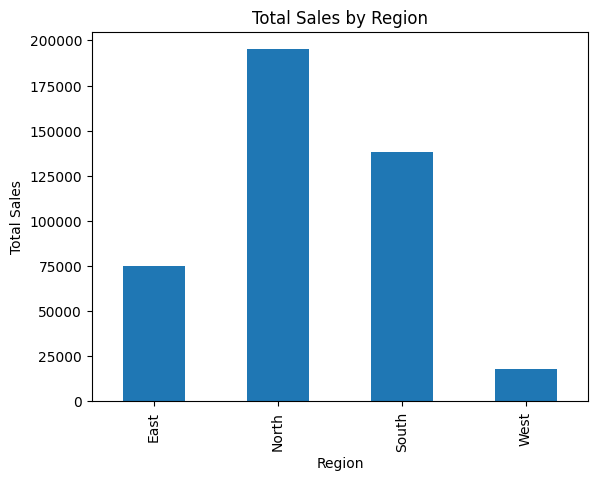

In [8]:
import matplotlib.pyplot as plt

region_sales.plot(kind="bar", title="Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


In [9]:
df["Month"] = df["Date"].dt.month_name()

monthly_sales = df.groupby("Month")["Total_Sales"].sum()
monthly_sales


Month
January    426000
Name: Total_Sales, dtype: int64

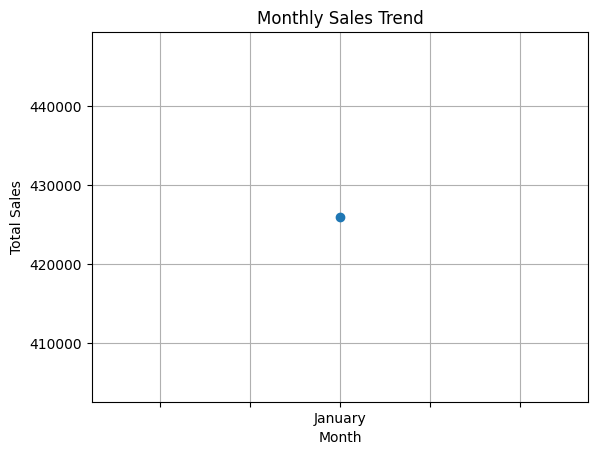

In [10]:
monthly_sales.plot(kind="line", marker="o", title="Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [11]:
top_products = (
    df.groupby("Product")["Total_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_products


Product
Mobile        200000
Laptop        165000
Chair          24500
Headphones     22500
Table          14000
Name: Total_Sales, dtype: int64

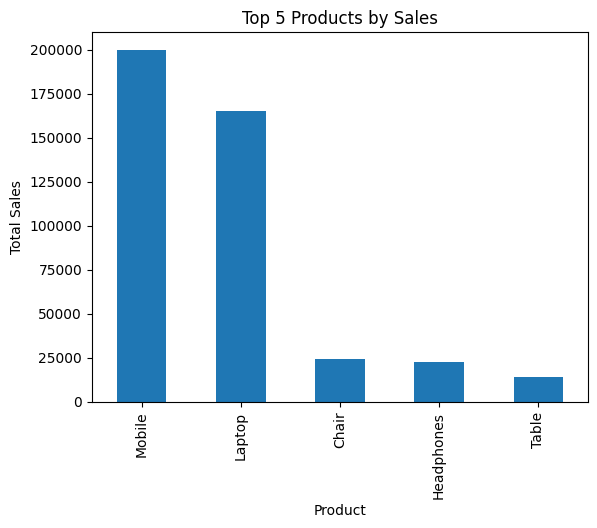

In [12]:
top_products.plot(kind="bar", title="Top 5 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()
